# Importing the libraries we need

In [101]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

# to have multiple outputs from  a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 100)
%matplotlib inline

# Importing the data set (obtained from kaggle data)
this data set is the 5-year history of 500 s&p index. 

after importing the data we first check to see its colomns and also print some general statistics about the data

In [102]:
df = pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [103]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


## extracting four main semiconductor manufacturer companies (AMD, Intel, NVIDA and QualCom) informations

### Data Quality Assessment:
1. after extracting the data we check the columns for unrecognized data types
2. and for nan values

We see that data type of date column needs to be changed but there is no nan or missing value

In [104]:
# select the main semiconductor manufacturers i.e AMD, Intel, NVIDIA and QualCom
scmf_list = ['AMD', 'INTC', 'NVDA', 'QCOM']
scmf = df[df['Name'].isin(scmf_list)]
print("Now cehcking the selected data ...")
scmf.head()
scmf.info()

# check to see if there is any NaN value
scmf.isna().sum()

Now cehcking the selected data ...


,date,open,high,low,close,volume,Name
38833,2013-02-08,2.580,2.60,2.58,2.59,5971768,AMD
38834,2013-02-11,2.590,2.70,2.59,2.67,22410941,AMD
38835,2013-02-12,2.705,2.78,2.69,2.77,13675442,AMD
38836,2013-02-13,2.810,2.83,2.73,2.75,11481985,AMD
38837,2013-02-14,2.740,2.75,2.69,2.75,13283766,AMD


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5036 entries, 38833 to 475967
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5036 non-null   object 
 1   open    5036 non-null   float64
 2   high    5036 non-null   float64
 3   low     5036 non-null   float64
 4   close   5036 non-null   float64
 5   volume  5036 non-null   int64  
 6   Name    5036 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 314.8+ KB


date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

luckily there is no Nan Value in the selected data frame, however from the above analysis we can see that the date format is not recognized and needed to be changed

In [105]:
# date and name format need to be changed to datatime and string 
scmf.loc[:, 'date'] = pd.to_datetime(scmf.loc[:,'date'], format="%Y/%m/%d")
#scmf['Name'] = scmf['Name'].astype('str')
scmf.head()
scmf.info()


,date,open,high,low,close,volume,Name
38833,2013-02-08,2.580,2.60,2.58,2.59,5971768,AMD
38834,2013-02-11,2.590,2.70,2.59,2.67,22410941,AMD
38835,2013-02-12,2.705,2.78,2.69,2.77,13675442,AMD
38836,2013-02-13,2.810,2.83,2.73,2.75,11481985,AMD
38837,2013-02-14,2.740,2.75,2.69,2.75,13283766,AMD


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5036 entries, 38833 to 475967
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5036 non-null   datetime64[ns]
 1   open    5036 non-null   float64       
 2   high    5036 non-null   float64       
 3   low     5036 non-null   float64       
 4   close   5036 non-null   float64       
 5   volume  5036 non-null   int64         
 6   Name    5036 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 314.8+ KB


# Data Exploration and Data Visualization

we compute different statistics like moving average and, correlation, distribution and plot different plots such as rate of return, history of prices, moving average, scatter plot, correlation between all of the indices and etc. 

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price')

Text(0.5, 1.0, 'Low Price History')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Traded Volume')

Text(0.5, 1.0, 'Traded Volume History')

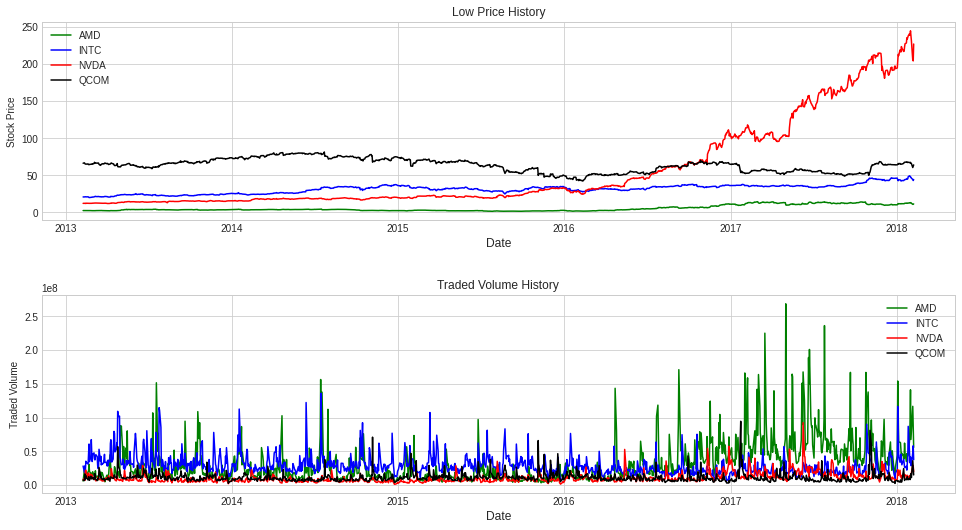

In [106]:
# plotting the Stock Price for the selected indices

# First Subplot
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8))
color_list=['green','blue','red','black']

for indx, name in enumerate(scmf_list):
    x = scmf.loc[scmf['Name'] == name]["date"]
    y = scmf.loc[scmf['Name'] == name]["low"]
    ax1.plot(x, y,color=color_list[indx],label=name)

ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Low Price History")
ax1.legend()

# Second Subplot
for indx, name in enumerate(scmf_list):
    x = scmf.loc[scmf['Name'] == name]["date"]
    y = scmf.loc[scmf['Name'] == name]["volume"]
    ax2.plot(x, y,color=color_list[indx],label=name)

ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Traded Volume")
ax2.set_title("Traded Volume History")
ax2.legend()

# toset enough spacing between the plots
f.tight_layout(pad=3.0)

## limiting the data to year to have a better understanding about the time frame that the data has been aquired

Now, we limit the time just to Jan 1 2017-Jan 1 2018

In [107]:
end =   dt.datetime(2018, 1, 1)
start = dt.datetime(2017, 1, 1)
mask=scmf['date'].between(start,end, inclusive=[True, False])
scmf1 = scmf.loc[mask]

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price')

Text(0.5, 1.0, 'Low Price History')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Traded Volume')

Text(0.5, 1.0, 'Traded Volume History')

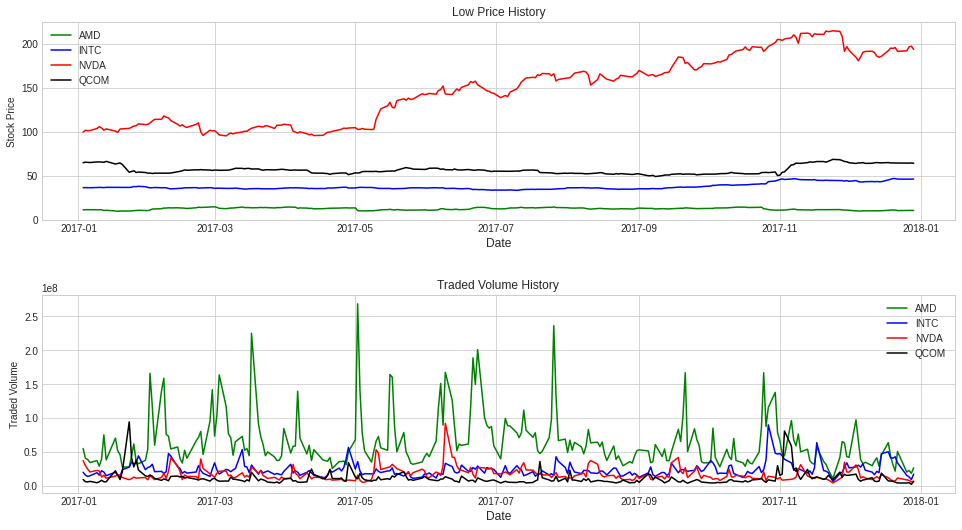

In [108]:
# plotting the Stock Price for the selected indices

# First Subplot
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8))
color_list=['green','blue','red','black']

for indx, name in enumerate(scmf_list):
    x = scmf1.loc[scmf1['Name'] == name]["date"]
    y = scmf1.loc[scmf1['Name'] == name]["low"]
    ax1.plot(x, y,color=color_list[indx],label=name)

ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Low Price History")
ax1.legend()

# Second Subplot
for indx, name in enumerate(scmf_list):
    x = scmf1.loc[scmf1['Name'] == name]["date"]
    y = scmf1.loc[scmf1['Name'] == name]["volume"]
    ax2.plot(x, y,color=color_list[indx],label=name)

ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Traded Volume")
ax2.set_title("Traded Volume History")
ax2.legend()

# toset enough spacing between the plots
f.tight_layout(pad=3.0)

Now let's compute the moving average for the low price

In [10]:
ma_day = [15 ,30 , 60]

for ma in ma_day:
    for name in scmf_list:        
        column_name = f"MA_{ma}_days" 
        scmf1[column_name] = scmf1.groupby('Name')['low'].transform(lambda x: x.rolling(ma, 1).mean())

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Moving Averages')

Text(0.5, 1.0, 'AMD low price and its moving averages')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Moving Averages')

Text(0.5, 1.0, 'Intel low price and its moving averages')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Moving Averages')

Text(0.5, 1.0, 'Intel low price and its moving averages')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Moving Averages')

Text(0.5, 1.0, 'Intel low price and its moving averages')

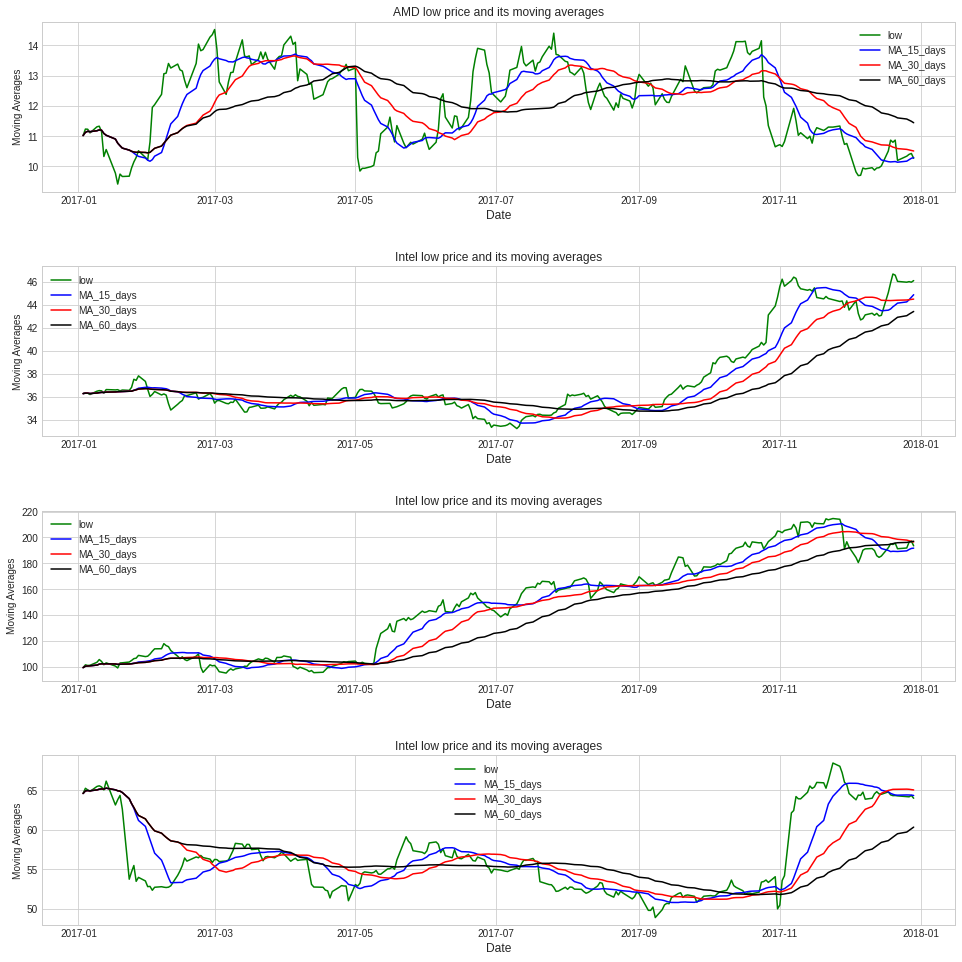

In [11]:
# First Subplot
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14,14))
leg = ['low','MA_15_days','MA_30_days','MA_60_days']

for indx, name in enumerate(scmf_list):
    x = scmf1.loc[scmf1['Name'] == 'AMD']["date"]
    y = scmf1.loc[scmf1['Name'] == 'AMD'][leg[indx]]
    ax1.plot(x, y,color=color_list[indx],label=leg[indx])

ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Moving Averages")
ax1.set_title("AMD low price and its moving averages")
ax1.legend()

# Second Subplot
for indx, name in enumerate(scmf_list):
    x = scmf1.loc[scmf1['Name'] == 'INTC']["date"]
    y = scmf1.loc[scmf1['Name'] == 'INTC'][leg[indx]]
    ax2.plot(x, y,color=color_list[indx],label=leg[indx])

ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Moving Averages")
ax2.set_title("Intel low price and its moving averages")
ax2.legend()

# Third Subplot
for indx, name in enumerate(scmf_list):
    x = scmf1.loc[scmf1['Name'] == 'NVDA']["date"]
    y = scmf1.loc[scmf1['Name'] == 'NVDA'][leg[indx]]
    ax3.plot(x, y,color=color_list[indx],label=leg[indx])

ax3.set_xlabel("Date", fontsize=12)
ax3.set_ylabel("Moving Averages")
ax3.set_title("Intel low price and its moving averages")
ax3.legend()

# Fourth Subplot
for indx, name in enumerate(scmf_list):
    x = scmf1.loc[scmf1['Name'] == 'QCOM']["date"]
    y = scmf1.loc[scmf1['Name'] == 'QCOM'][leg[indx]]
    ax4.plot(x, y,color=color_list[indx],label=leg[indx])

ax4.set_xlabel("Date", fontsize=12)
ax4.set_ylabel("Moving Averages")
ax4.set_title("Intel low price and its moving averages")
ax4.legend()

# toset enough spacing between the plots
f.tight_layout(pad=3.0)

## in above we plotted the moving average for different rolling windows to have a better better inspect the data

In [12]:
scmf1['pct_change'] = scmf1.groupby(['Name'])['low'].pct_change()
scmf1.head()
# this will create NaN for the first row on each index
scmf1.isna().sum()
scmf1.fillna(0, inplace=True)
scmf1.isna().sum()
scmf1.head()

,date,open,high,low,close,volume,Name,MA_15_days,MA_30_days,MA_60_days,pct_change
39815,2017-01-03,11.42,11.6500,11.020,11.43,55181960,AMD,11.020000,11.020000,11.020000,NaN
39816,2017-01-04,11.45,11.5204,11.235,11.43,40781190,AMD,11.127500,11.127500,11.127500,0.019510
39817,2017-01-05,11.43,11.6900,11.230,11.24,38855214,AMD,11.161667,11.161667,11.161667,-0.000445
39818,2017-01-06,11.29,11.4900,11.110,11.32,34453462,AMD,11.148750,11.148750,11.148750,-0.010686
39819,2017-01-09,11.37,11.6400,11.310,11.49,37304797,AMD,11.181000,11.181000,11.181000,0.018002


date          0
open          0
high          0
low           0
close         0
volume        0
Name          0
MA_15_days    0
MA_30_days    0
MA_60_days    0
pct_change    4
dtype: int64

date          0
open          0
high          0
low           0
close         0
volume        0
Name          0
MA_15_days    0
MA_30_days    0
MA_60_days    0
pct_change    0
dtype: int64

,date,open,high,low,close,volume,Name,MA_15_days,MA_30_days,MA_60_days,pct_change
39815,2017-01-03,11.42,11.6500,11.020,11.43,55181960,AMD,11.020000,11.020000,11.020000,0.000000
39816,2017-01-04,11.45,11.5204,11.235,11.43,40781190,AMD,11.127500,11.127500,11.127500,0.019510
39817,2017-01-05,11.43,11.6900,11.230,11.24,38855214,AMD,11.161667,11.161667,11.161667,-0.000445
39818,2017-01-06,11.29,11.4900,11.110,11.32,34453462,AMD,11.148750,11.148750,11.148750,-0.010686
39819,2017-01-09,11.37,11.6400,11.310,11.49,37304797,AMD,11.181000,11.181000,11.181000,0.018002


Text(0.5, 0, 'Date')

Text(0, 0.5, 'Percentage Change')

Text(0.5, 1.0, 'Percentage Change plot')

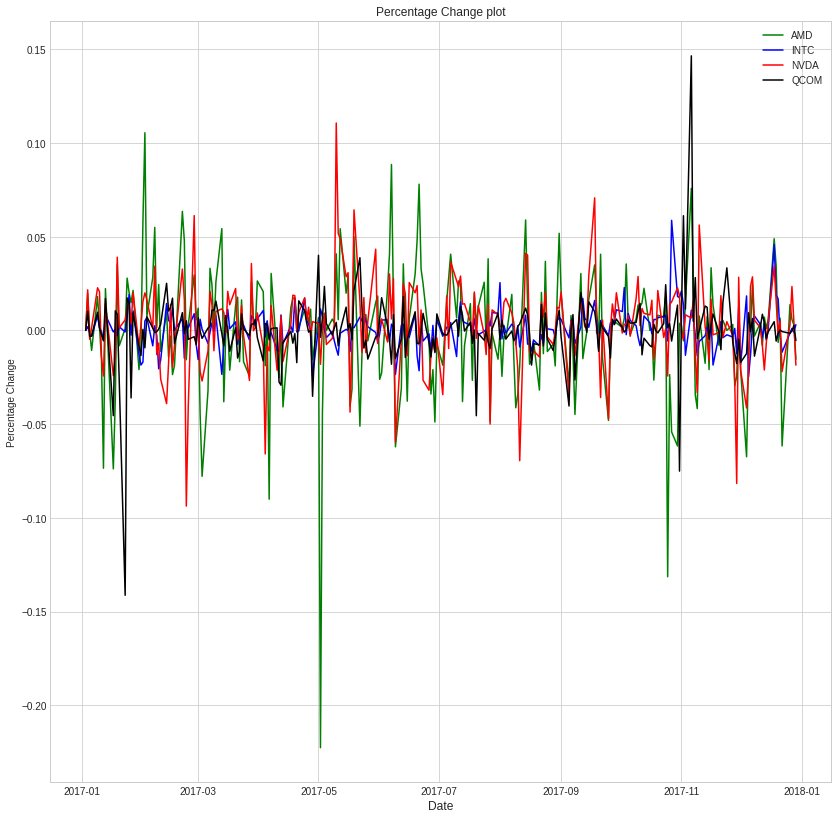

In [13]:
f, ax = plt.subplots(figsize=(14,14))
for indx, name in enumerate(scmf_list):
    x = scmf1.loc[scmf1['Name'] == name]["date"]
    y = scmf1.loc[scmf1['Name'] == name]["pct_change"]
    ax.plot(x, y,color=color_list[indx],label=name)
    
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Percentage Change")
ax.set_title("Percentage Change plot")
ax.legend()

<Figure size 1008x1008 with 0 Axes>

Text(0, 0.5, 'Daily Return')

Text(0.5, 1.0, 'AMD')

Text(0, 0.5, 'Daily Return')

Text(0.5, 1.0, 'INTC')

Text(0, 0.5, 'Daily Return')

Text(0.5, 1.0, 'NVDA')

Text(0, 0.5, 'Daily Return')

Text(0.5, 1.0, 'QCOM')

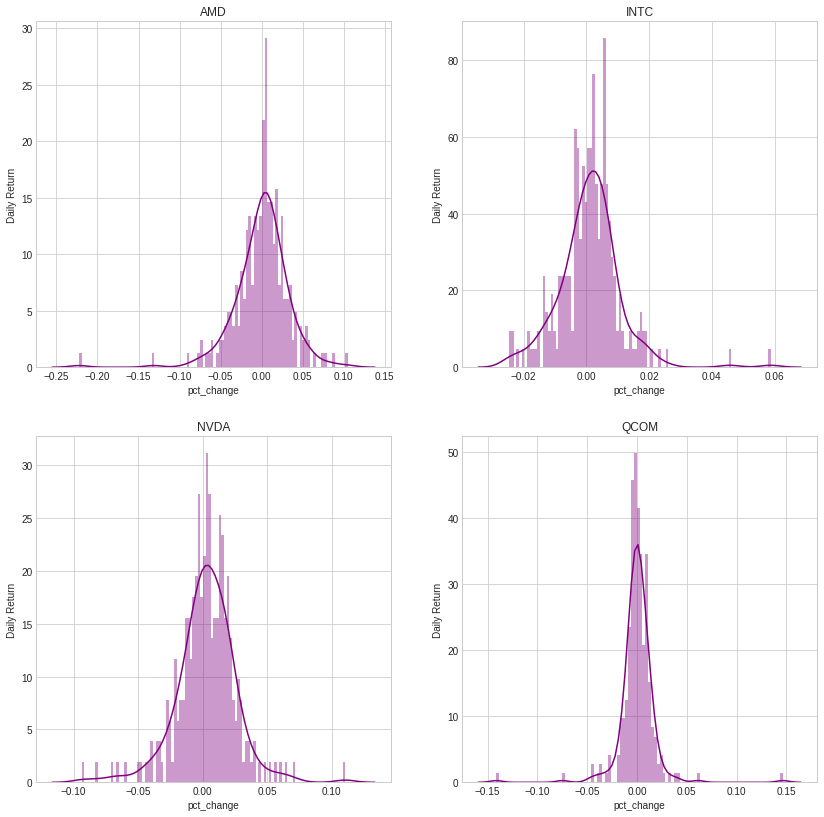

In [14]:
plt.figure(figsize=(14, 14))
for indx, name in enumerate(scmf_list,1):
    plt.subplot(2, 2, indx)
    y = scmf1.loc[scmf1['Name'] == name]["pct_change"]
    sb.distplot(y, bins=100, color='purple') 
    plt.ylabel('Daily Return')
    plt.title(f'{name}')

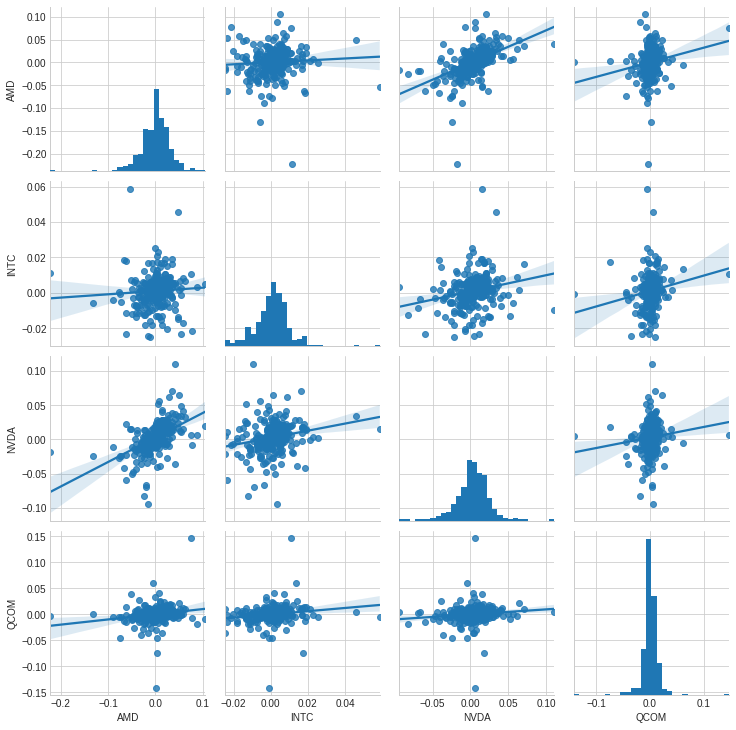

In [15]:
a=scmf1.loc[scmf1['Name'] == "AMD" ]["pct_change"].values
b=scmf1.loc[scmf1['Name'] == "INTC"]["pct_change"].values
c=scmf1.loc[scmf1['Name'] == "NVDA"]["pct_change"].values
d=scmf1.loc[scmf1['Name'] == "QCOM"]["pct_change"].values
ndf=pd.DataFrame(np.array([a,b,c,d]).transpose(), columns=scmf_list)
sb.pairplot(ndf, kind='reg',diag_kind='hist', diag_kws = {'bins':30})

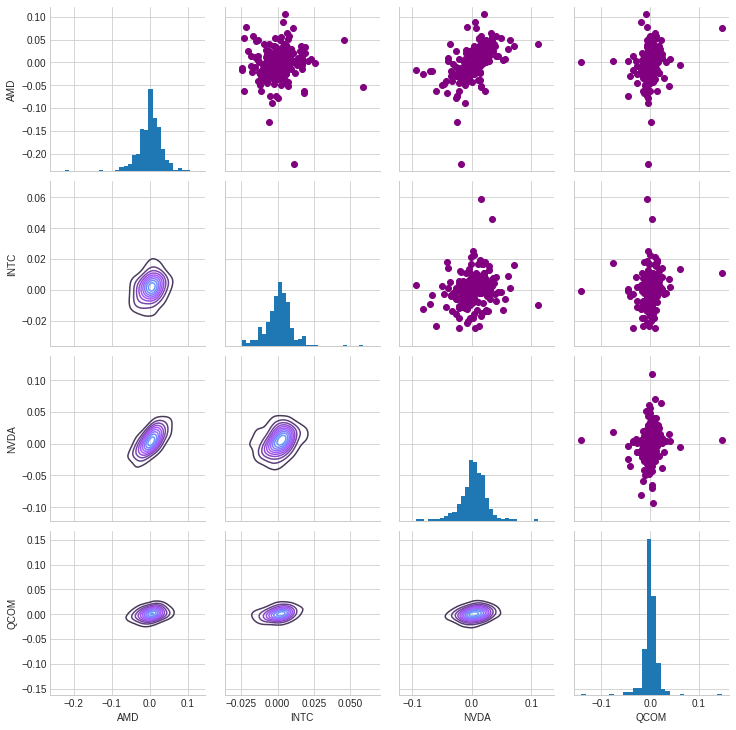

In [16]:
ndf_fig = sb.PairGrid(ndf)

# Using map_upper we can specify what the upper triangle will look like.
ndf_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
ndf_fig.map_lower(sb.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
ndf_fig.map_diag(plt.hist, bins=30)

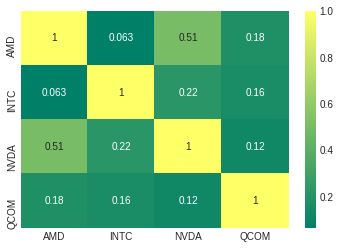

In [17]:
sb.heatmap(ndf.corr(), annot=True, cmap='summer')

From this exploratory data analysis we learn that AMD and INTEL stock are highly correlated after that we can see AMD is also highly corrolated with NVDA

<Figure size 360x360 with 0 Axes>

Text(0.5, 0, 'Expected return')

Text(0, 0.5, 'Risk')

Text(50, 50, 'AMD')

Text(50, 50, 'INTC')

Text(50, 50, 'NVDA')

Text(50, 50, 'QCOM')

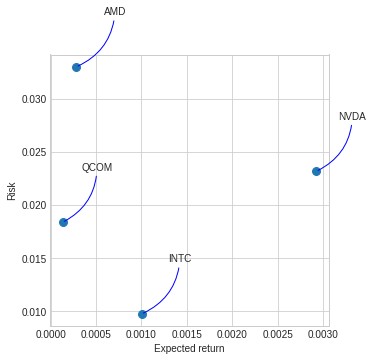

In [18]:
# to see how much risk we should expect by investing on each index and its return value
area = np.pi*20

plt.figure(figsize=(5, 5))
plt.scatter(ndf.mean(), ndf.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(ndf.columns, ndf.mean(), ndf.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Above plot show that NVIDIA stock gives the higher expected return with a modest risk after that is Intel which has the lowest risk with an acceptable rate of return. Then, let say we want to invest on NVDA and we want to predict its low price. As we plotted it earlier for 2017-2018.

**based on the above analysis we conclude that the safest stock to invest is NVIDIA and we are interested in predicting its future low price. Since we are dealing with a time series, we use a deep learning LSTM neural network with one input, one output and two hidden layers and we evaluate the results by deviding the data into training and test data** 

In [51]:
#Create a new dataframe with only the 'Close column
nvd_st_ind=502
ln=251
nvdf=scmf1.filter(['low'])
nvd_low = nvdf.iloc[nvd_st_ind:nvd_st_ind+ln].values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(nvd_low) * .8 ))
training_data_len

201

In [52]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(nvd_low)

In [53]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

# we want to use LSTM to predict the future based on earlier days information
prev_days = 45
for i in range(prev_days, len(train_data)):
    x_train.append(train_data[i-prev_days:i, 0])
    y_train.append(train_data[i, 0])
    
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(156, 45, 1)

Using Keras with TensoFlow as the backend to create an LSTM Deep Learning block

In [94]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(20, return_sequences= False))
model.add(Dense(5))
model.add(Dense(1))

In [95]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [96]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

156/156 [==============================] - 1s 9ms/step - loss: 0.0167


In [97]:
#Now we need to create the testing data set
test_data = scaled_data[training_data_len - prev_days: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = nvd_low[training_data_len:, :]
for i in range(prev_days, len(test_data)):
    x_test.append(test_data[i-prev_days:i, 0])

In [98]:
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

11.835157529659249

**very modest RMS acheived**

now we plot the data

<Figure size 1008x504 with 0 Axes>

Text(0.5, 1.0, 'Model')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'NVIDIA Low Price USD ($)')

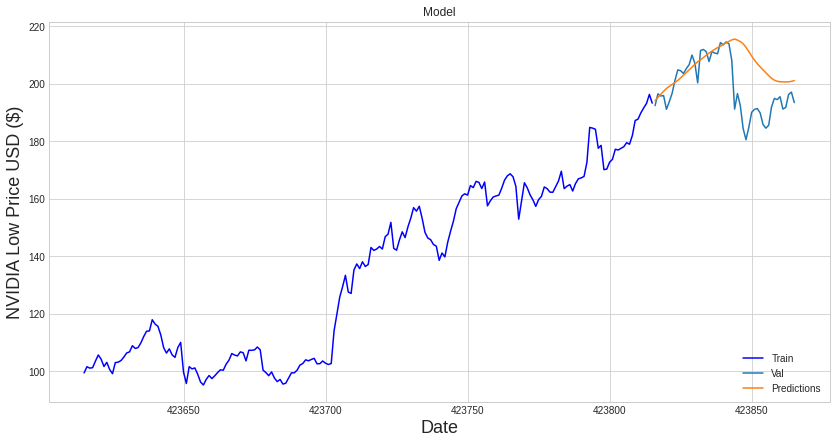

In [99]:
# Plot the data
data=nvdf[nvd_st_ind:nvd_st_ind+ln]
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,7))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('NVIDIA Low Price USD ($)', fontsize=18)
plt.plot(train['low'],color='blue')
plt.plot(valid[['low', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [100]:
valid

,low,Predictions
423816,192.4501,194.186661
423817,196.5400,195.268127
423818,195.8000,196.381393
423819,195.9400,197.427719
423820,191.1700,198.404938
423821,193.8100,199.147095
423822,196.7500,199.814301
423823,201.2200,200.476700
423824,204.9000,201.238144
423825,204.6000,202.134903
